In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'smart-agricultural-production-optimizing-engine:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2088120%2F3468346%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240622%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240622T172322Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D22862dfc75f4af14360423cc6e504f2b290e18dc9a57a97a72e786fb685959efd88fd757956d0dfb5ebd971144971ef36e1516aab015b126013f66d0554415d85393b71cce541d0eee790fc6237e2bb9e5c6b365c7de4b054fc0bfe8bc095065e46c64be2cfbd3f9cc256de84f24b0af6cd5fd5e6329f25e420f1767e98da25b3d94143f3146e20b57f93e5aa137cd738471deee11ccefbfcd10a7a64a2e0d354c0dc99858ced6416e250e52aa6d0903e8c2b763b1a55e7d5123fbab3a0fbdf24aaf2611ed8d8c19fc12370012549c464f386417da0c0b1818fc5c84adaffe40a7132811396d12b055e69684f91bede9fb62773cc54c24cb3a2573e23edcb8f4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 65234 bytes downloaded
Downloaded and uncompressed: smart-agricultural-production-optimizing-engine
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv')

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
data.shape

(2200, 8)

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [13]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
crop_summary = pd.pivot_table(data,index=['label'],
                              aggfunc='mean')

In [16]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [19]:
X = data.drop('label', axis=1)
y = data['label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

In [21]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 1474, number of used features: 7
[LightGBM] [Info] Start training from score -3.061629
[LightGBM] [Info] Start training from score -3.076227
[LightGBM] [Info] Start training from score -3.121348
[LightGBM] [Info] Start training from score -3.184861
[LightGBM] [Info] Start training from score -3.047240
[LightGBM] [Info] Start training from score -3.076227
[LightGBM] [Info] Start training from score -3.019069
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.061629
[LightGBM] [Info] Start training from score -3.047240
[LightGBM] [Info] Start training from score -2.991670
[LightGBM] [Info] Start training from score -3.033055
[LightGBM] [Info] Start training from score -3.033055
[LightGBM] 

LGBMClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9890


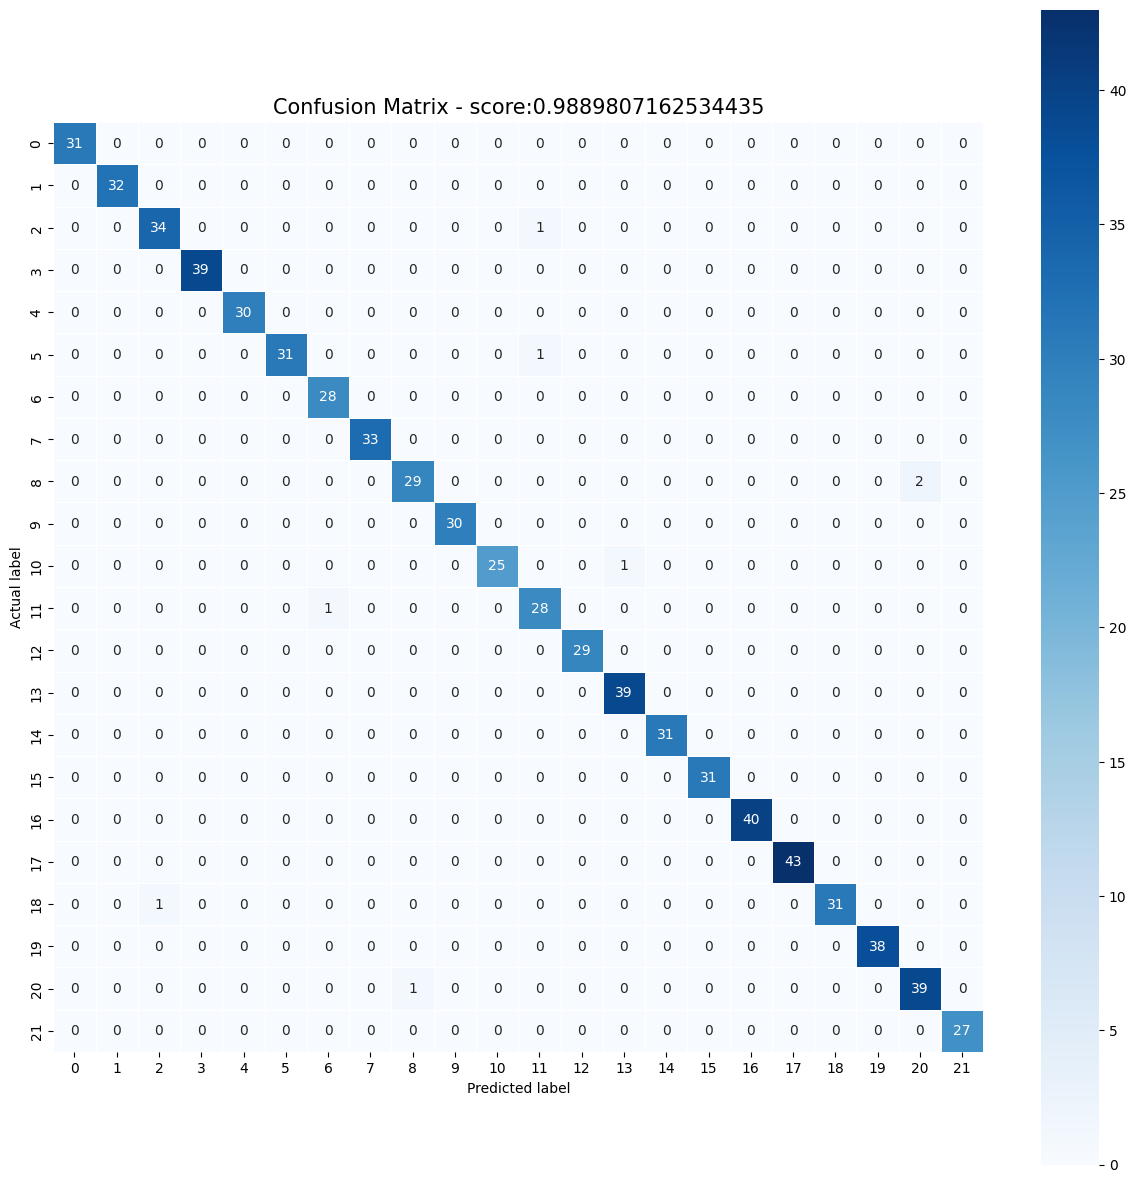

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.97      0.98        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.93      0.97      0.95        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      1.00      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred=classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score: 0.9848


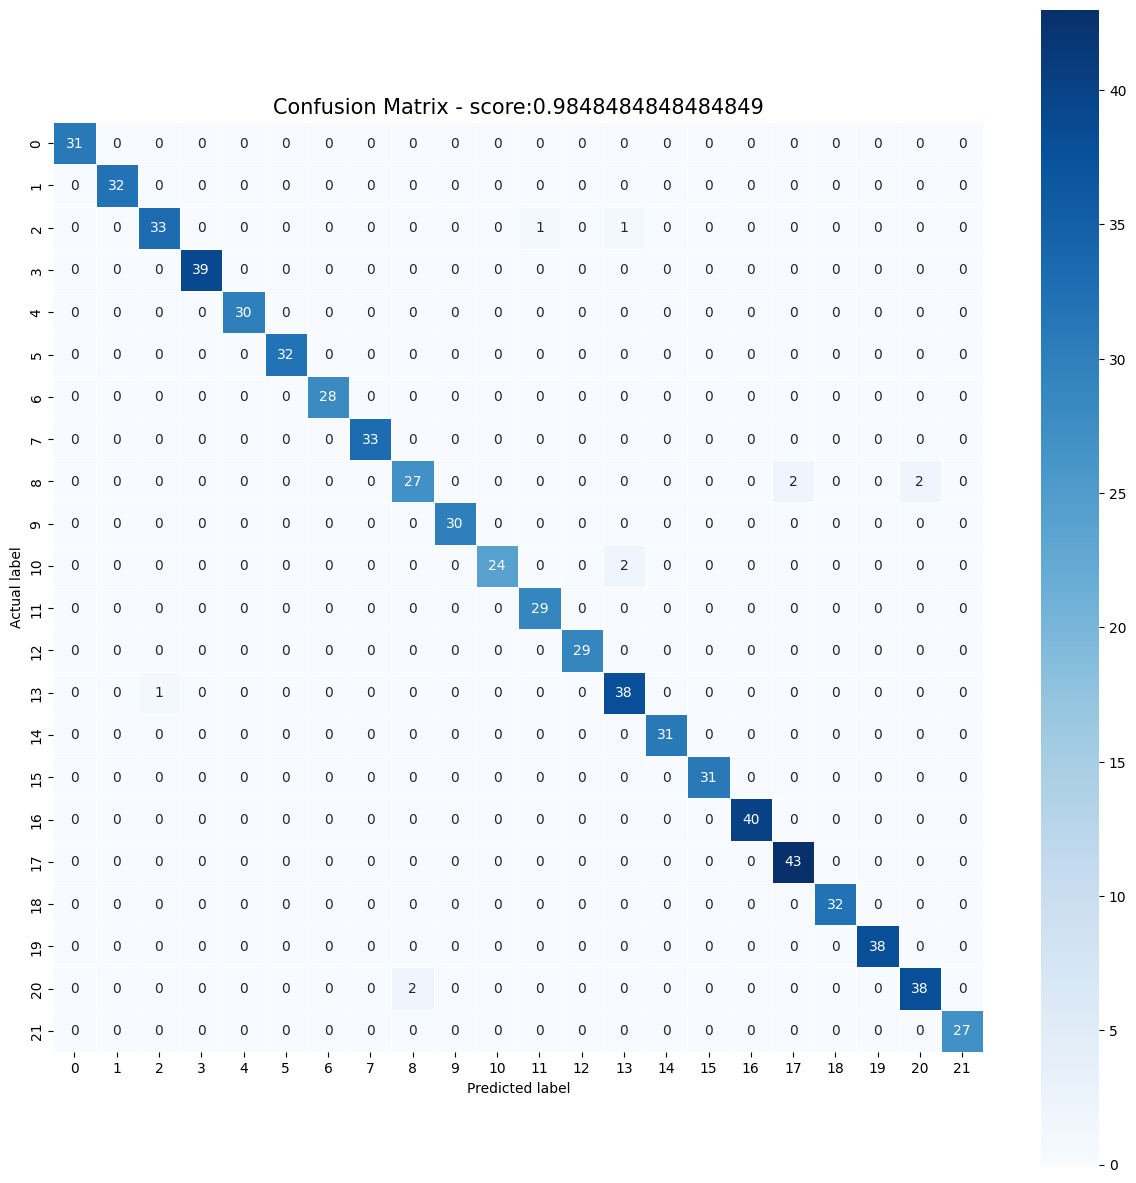

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.94      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.93      0.87      0.90        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.96    

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:
y_pred= classifier_rf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.9931


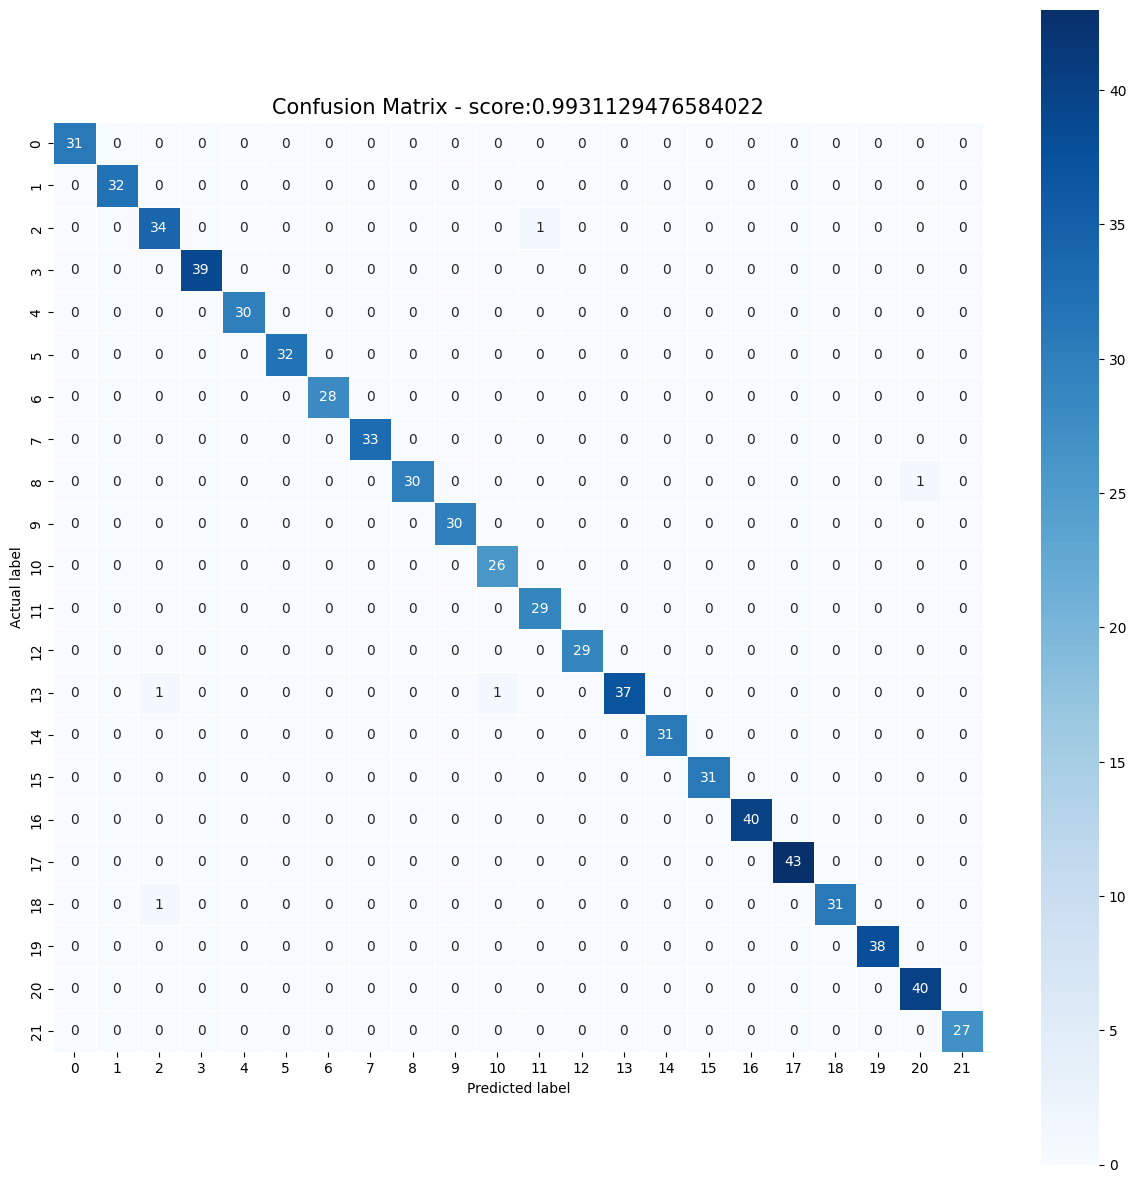

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.94      0.97      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.96      1.00      0.98        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.95      0.97        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

In [36]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = classifier_lr.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression Model accuracy score: 0.9435


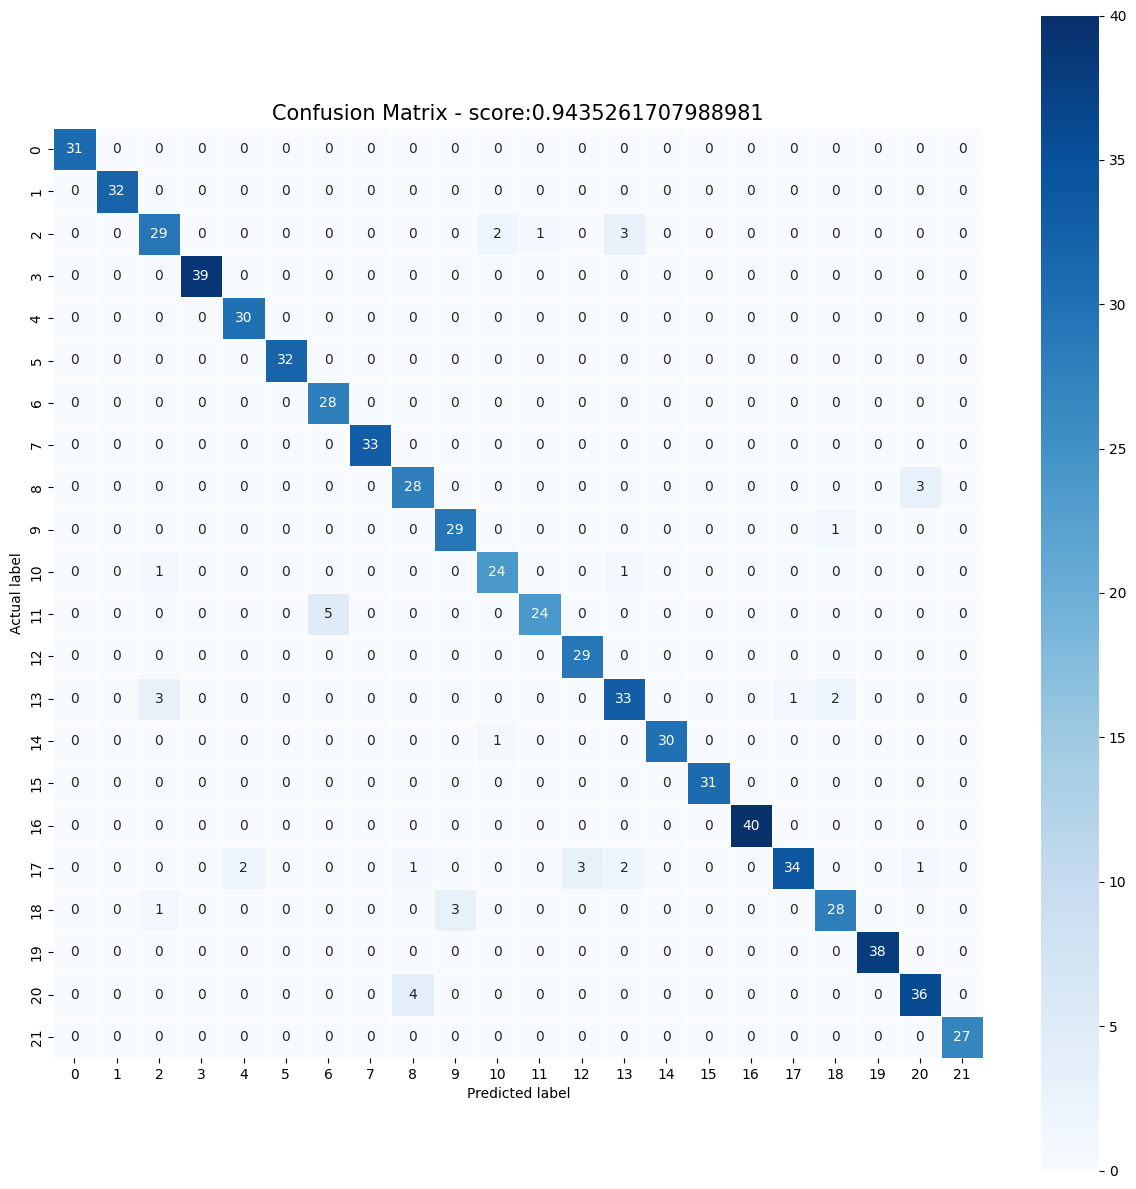

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.85      0.83      0.84        35
    chickpea       1.00      1.00      1.00        39
     coconut       0.94      1.00      0.97        30
      coffee       1.00      1.00      1.00        32
      cotton       0.85      1.00      0.92        28
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.90      0.88        31
 kidneybeans       0.91      0.97      0.94        30
      lentil       0.89      0.92      0.91        26
       maize       0.96      0.83      0.89        29
       mango       0.91      1.00      0.95        29
   mothbeans       0.85      0.85      0.85        39
    mungbean       1.00      0.97      0.98        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.97    